# **Laboratorio 2 - Simulación Computacional**
## **2PA-2023**  ##
Elabore cada uno de los puntos incluyendo la implementación correspondiente con sus dependencias y librerías en Python debidamente ejecutadas y guardadas. Debe descargar el archivo de Notebook de Jupyter o Google Colab (.ipynb) ejecutado y guardado para enviarlo adjunto por la plataforma Moodle del curso en el Laboratorio 2 correspondiente.

Fecha máxima de entrega: ***23:59h - Septiembre 20 de 2023***


## **1. Generación de números aleatorios.** ##

### 1.1. ###

Implementar el método de cuadrados medios (Mid-Square) para cualquier numero de $2n$ cifras donde al menos $n \geqslant 2$ (debe validarlo), y genere 100 ($N=100$) numeros aleatorios $u_i$ usando como semilla $x_0$ los últimos 4 dígitos de su código estudiantil.

In [15]:
from decimal import Decimal

def cuadrados_medios(codigo_estudiantil, n, N):
    random_numbers = []
    if n < 2:
        raise ValueError("n debe ser mayor o igual a 2")
    
    x0 = int(str(codigo_estudiantil)[-4:])

    for _ in range(N):
        seed_squared = Decimal(x0) ** 2
        seed_str = str(seed_squared).zfill(4 * n)
        middle = len(seed_str) // 2
        random_num_str = seed_str[middle - n: middle + n]
        random_decimal = Decimal("0." + random_num_str)
        random_numbers.append(random_decimal)
        x0 = int(random_num_str)
    
    return random_numbers

codigo_estudiantil = 4400  
n = 2
N = 100
numeros_aleatorios = cuadrados_medios(codigo_estudiantil, n, N)

print("Números generados:", end=" [ ")
for i, numero in enumerate(numeros_aleatorios):
    print(f"{numero:.{2*n}f}", end=" ")
print("]")


Números generados: [ 0.3600 0.9600 0.1600 0.5600 0.3600 0.9600 0.1600 0.5600 0.3600 0.9600 0.1600 0.5600 0.3600 0.9600 0.1600 0.5600 0.3600 0.9600 0.1600 0.5600 0.3600 0.9600 0.1600 0.5600 0.3600 0.9600 0.1600 0.5600 0.3600 0.9600 0.1600 0.5600 0.3600 0.9600 0.1600 0.5600 0.3600 0.9600 0.1600 0.5600 0.3600 0.9600 0.1600 0.5600 0.3600 0.9600 0.1600 0.5600 0.3600 0.9600 0.1600 0.5600 0.3600 0.9600 0.1600 0.5600 0.3600 0.9600 0.1600 0.5600 0.3600 0.9600 0.1600 0.5600 0.3600 0.9600 0.1600 0.5600 0.3600 0.9600 0.1600 0.5600 0.3600 0.9600 0.1600 0.5600 0.3600 0.9600 0.1600 0.5600 0.3600 0.9600 0.1600 0.5600 0.3600 0.9600 0.1600 0.5600 0.3600 0.9600 0.1600 0.5600 0.3600 0.9600 0.1600 0.5600 0.3600 0.9600 0.1600 0.5600 ]


##1.2.##
Para los siguientes generadores congruenciales mixtos genere 200 ($N=200$) números aleatorios  $u_i = u_1,...,u_{200}$, e indique el tamaño del ciclo (si lo tiene).

**a)** $x_0=123, x_n = (114x_{n-1}+9) \mod 127$

In [18]:
def generador_congruencial_mixto(x0, a, c, m, n):
    numeros_generados = []
    x_n = x0

    # Generar los números pseudoaleatorios
    for _ in range(n):
        x_n = (a * x_n + c) % m
        u_n = x_n / m
        numeros_generados.append(u_n)

    return numeros_generados

# Parámetros del generador congruencial mixto
x0 = 123
a = 114
c = 9
m = 127
N = 200  # Número de valores a generar

# Generar 200 números aleatorios con el generador congruencial mixto
numeros_aleatorios = generador_congruencial_mixto(x0, a, c, m, N)

# Imprimir resultados en una fila
print("Números generados:", end=" ")
for i, numero in enumerate(numeros_aleatorios):
    print(f"{numero:.6f}", end=" ")

# Calcular el tamaño del ciclo si lo tiene
tamaño_ciclo = 0
if len(numeros_aleatorios) > 0:
    # Buscar repeticiones en la secuencia generada
    for i in range(len(numeros_aleatorios)):
        if numeros_aleatorios[i] == numeros_aleatorios[0] and i != 0:
            tamaño_ciclo = i
            break

if tamaño_ciclo > 0:
    print(f"\n\nEl generador tiene un ciclo de tamaño {tamaño_ciclo}.")
else:
    print("\n\nEl generador no presenta un ciclo en los primeros 200 números generados.")



Números generados: 0.480315 0.826772 0.322835 0.874016 0.708661 0.858268 0.913386 0.196850 0.511811 0.417323 0.645669 0.677165 0.267717 0.590551 0.393701 0.952756 0.685039 0.165354 0.921260 0.094488 0.842520 0.118110 0.535433 0.110236 0.637795 0.779528 0.937008 0.889764 0.503937 0.519685 0.314961 0.976378 0.377953 0.157480 0.023622 0.763780 0.141732 0.228346 0.102362 0.740157 0.448819 0.236220 0.000000 0.070866 0.149606 0.125984 0.433071 0.440945 0.338583 0.669291 0.370079 0.259843 0.692913 0.062992 0.251969 0.795276 0.732283 0.551181 0.905512 0.299213 0.181102 0.716535 0.755906 0.244094 0.897638 0.401575 0.850394 0.015748 0.866142 0.811024 0.527559 0.212598 0.307087 0.078740 0.047244 0.456693 0.133858 0.330709 0.771654 0.039370 0.559055 0.803150 0.629921 0.881890 0.606299 0.188976 0.614173 0.086614 0.944882 0.787402 0.834646 0.220472 0.204724 0.409449 0.748031 0.346457 0.566929 0.700787 0.960630 0.582677 0.496063 0.622047 0.984252 0.275591 0.488189 0.724409 0.653543 0.574803 0.598425 

**b)** $x_0=21, x_n = 3x_{n-1} \mod 300$

In [17]:
def generador_congruencial_mixto(x0, a, m, n):
    numeros_generados = []
    x_n = x0

    # Generar los números pseudoaleatorios
    for _ in range(n):
        x_n = (a * x_n) % m
        u_n = x_n / m
        numeros_generados.append(u_n)

    return numeros_generados

# Parámetros del generador congruencial mixto
x0 = 21
a = 3
m = 300
N = 200  # Número de valores a generar

# Generar 200 números aleatorios con el generador congruencial mixto
numeros_aleatorios = generador_congruencial_mixto(x0, a, m, N)

# Calcular el tamaño del ciclo si lo tiene
tamaño_ciclo = 0
if len(numeros_aleatorios) > 0:
    # Buscar repeticiones en la secuencia generada
    for i in range(len(numeros_aleatorios)):
        if numeros_aleatorios[i] == numeros_aleatorios[0] and i != 0:
            tamaño_ciclo = i
            break

# Imprimir resultados en una fila
print("Números generados:", end=" ")
for i, numero in enumerate(numeros_aleatorios):
    print(f"{numero:.4f}", end=" ")

if tamaño_ciclo > 0:
    print(f"\n\nEl generador tiene un ciclo de tamaño {tamaño_ciclo}.")
else:
    print("\n\nEl generador no presenta un ciclo en los primeros 200 números generados.")


Números generados: 0.2100 0.6300 0.8900 0.6700 0.0100 0.0300 0.0900 0.2700 0.8100 0.4300 0.2900 0.8700 0.6100 0.8300 0.4900 0.4700 0.4100 0.2300 0.6900 0.0700 0.2100 0.6300 0.8900 0.6700 0.0100 0.0300 0.0900 0.2700 0.8100 0.4300 0.2900 0.8700 0.6100 0.8300 0.4900 0.4700 0.4100 0.2300 0.6900 0.0700 0.2100 0.6300 0.8900 0.6700 0.0100 0.0300 0.0900 0.2700 0.8100 0.4300 0.2900 0.8700 0.6100 0.8300 0.4900 0.4700 0.4100 0.2300 0.6900 0.0700 0.2100 0.6300 0.8900 0.6700 0.0100 0.0300 0.0900 0.2700 0.8100 0.4300 0.2900 0.8700 0.6100 0.8300 0.4900 0.4700 0.4100 0.2300 0.6900 0.0700 0.2100 0.6300 0.8900 0.6700 0.0100 0.0300 0.0900 0.2700 0.8100 0.4300 0.2900 0.8700 0.6100 0.8300 0.4900 0.4700 0.4100 0.2300 0.6900 0.0700 0.2100 0.6300 0.8900 0.6700 0.0100 0.0300 0.0900 0.2700 0.8100 0.4300 0.2900 0.8700 0.6100 0.8300 0.4900 0.4700 0.4100 0.2300 0.6900 0.0700 0.2100 0.6300 0.8900 0.6700 0.0100 0.0300 0.0900 0.2700 0.8100 0.4300 0.2900 0.8700 0.6100 0.8300 0.4900 0.4700 0.4100 0.2300 0.6900 0.0700 0

**c)** $x_0=1317,x_n = (13x_{n-1}+5) \mod 21$

In [20]:
def generador_congruencial_mixto(x0, a, c, m, n):
    numeros_generados = []
    x_n = x0

    # Generar los números pseudoaleatorios
    for _ in range(n):
        x_n = (a * x_n + c) % m
        u_n = x_n / m
        numeros_generados.append(u_n)

    return numeros_generados

# Parámetros del generador congruencial mixto
x0 = 1317
a = 13
c = 5
m = 21
N = 200  # Número de valores a generar

# Generar 200 números aleatorios con el generador congruencial mixto
numeros_aleatorios = generador_congruencial_mixto(x0, a, c, m, N)

# Imprimir resultados en una fila
print("Números generados:", end=" ")
for i, numero in enumerate(numeros_aleatorios):
    print(f"{numero:.6f}", end=" ")

# Calcular el tamaño del ciclo si lo tiene
tamaño_ciclo = 0
if len(numeros_aleatorios) > 0:
    # Buscar repeticiones en la secuencia generada
    for i in range(len(numeros_aleatorios)):
        if numeros_aleatorios[i] == numeros_aleatorios[0] and i != 0:
            tamaño_ciclo = i
            break

if tamaño_ciclo > 0:
    print(f"\n\nEl generador tiene un ciclo de tamaño {tamaño_ciclo}.")
else:
    print("\n\nEl generador no presenta un ciclo en los primeros 200 números generados.")


Números generados: 0.523810 0.047619 0.857143 0.380952 0.190476 0.714286 0.523810 0.047619 0.857143 0.380952 0.190476 0.714286 0.523810 0.047619 0.857143 0.380952 0.190476 0.714286 0.523810 0.047619 0.857143 0.380952 0.190476 0.714286 0.523810 0.047619 0.857143 0.380952 0.190476 0.714286 0.523810 0.047619 0.857143 0.380952 0.190476 0.714286 0.523810 0.047619 0.857143 0.380952 0.190476 0.714286 0.523810 0.047619 0.857143 0.380952 0.190476 0.714286 0.523810 0.047619 0.857143 0.380952 0.190476 0.714286 0.523810 0.047619 0.857143 0.380952 0.190476 0.714286 0.523810 0.047619 0.857143 0.380952 0.190476 0.714286 0.523810 0.047619 0.857143 0.380952 0.190476 0.714286 0.523810 0.047619 0.857143 0.380952 0.190476 0.714286 0.523810 0.047619 0.857143 0.380952 0.190476 0.714286 0.523810 0.047619 0.857143 0.380952 0.190476 0.714286 0.523810 0.047619 0.857143 0.380952 0.190476 0.714286 0.523810 0.047619 0.857143 0.380952 0.190476 0.714286 0.523810 0.047619 0.857143 0.380952 0.190476 0.714286 0.523810 

## **2. Usando números aleatorios para evaluar integrales.** ([*Sección 3.2, Capítulo 3* \[Ross99\]](https://drive.google.com/file/d/0B0MRo23s_UhyWkt6Z2V2dWc1d3M/view)) ##

Tomando como referencia la Sección 3.2 del Capítulo 3 del libro [Ross99], use simulación computacional para aproximar las siguientes integrales generando $N=1000$ números aleatorios de un generador congruencial mixto de los disponibles en https://es.wikipedia.org/wiki/Generador_lineal_congruencial como *Numerical Recipes* o *Borland C/C++*. Compare su estimación con la respuesta exacta o solución analítica (resolviendo la integral) si es conocida.
### 2.1. ###
$\int_{0}^{1} \textrm{exp}\left \{ e^{x} \right \}dx$

In [53]:
# Integrales a usar
def f(x, opcion):
    if opcion == 1:
        return np.exp(x)
    elif opcion == 2:
        return (1 - x**2)**(3/2)
    elif opcion == 3:
        return math.exp(x + x**2)
    else:
        raise ValueError("Opción no válida")

# Generador congruencial mixto
def generador_congruencial_mixto(a, c, m, semilla, N, integral):
    integral_estimada = 0
    numeros_aleatorios = []
    Xi = semilla

    for _ in range(N):
        Xi = (a * Xi + c) % m
        integral_estimada += f(Xi / m, integral)
        print(integral_estimada)
    return integral_estimada / N

# Parámetros del generador congruencial mixto (Numerical Recipes)
a = 1664525
c = 1013904223
m = 2**32
semilla = 202
integral = 1

# Número de muestras aleatorias
N = 1000

# Generar números aleatorios
integral_estimada = generador_congruencial_mixto(a, c, m, semilla, N, integral)

# Calcular la longitud del intervalo
longitud_intervalo = 1 - 0

# Estimación de la integral
integral_estimada *= longitud_intervalo

# Valor exacto de la integral (solución analítica)
integral_analitica = 1.71828

# Imprimir resultados
print(f"Valor estimación de la integral: {integral_estimada}")
print(f"Valor real de la integral: {integral_analitica}")


1.3693738110498745
3.1928186332422372
4.332335957069456
5.488575321623841
6.498889590696239
8.432526500120893
9.944183576062928
11.963853086529948
13.27150755753306
14.476403541985892
16.043628415661267
17.115733290570912
19.67520018240655
20.839681550178224
21.977074192379565
23.92348299958756
25.829248496050212
27.294662977092287
29.30445147353956
31.473710004318022
32.60620808713909
33.868754322349766
36.066245199627765
38.14646491992043
40.21482704039803
41.8822426275717
42.93100751924335
44.68417319813214
45.72853641222981
48.02336161357789
49.06319184552085
50.49202537446116
53.103584768199994
55.48602329648767
56.78393259837897
57.804751876715976
59.696488716407046
60.93836441455029
62.526962817928265
63.702104072120186
64.91197192281504
67.11599012464293
68.99634859265932
70.2709004576309
71.3504101618029
74.02659436262583
75.35910534663277
76.71605240498835
78.30535518830217
79.34969214901376
82.03288828240899
84.35908949448077
85.45260981511623
86.857468307444
88.046024905935

### 2.2. ###
$\int_{0}^{1}{(1-x^2)^{\frac{3}{2}}}dx$

In [55]:
# Integrales a usar
def f(x, opcion):
    if opcion == 1:
        return np.exp(x)
    elif opcion == 2:
        return (1 - x**2)**(3/2)
    elif opcion == 3:
        return math.exp(x + x**2)
    else:
        raise ValueError("Opción no válida")

# Generador congruencial mixto
def generador_congruencial_mixto(a, c, m, semilla, N, integral):
    integral_estimada = 0
    numeros_aleatorios = []
    Xi = semilla

    for _ in range(N):
        Xi = (a * Xi + c) % m
        integral_estimada += f(Xi / m, integral)
        print(integral_estimada)
    return integral_estimada / N

# Parámetros del generador congruencial mixto (Numerical Recipes)
a = 1664525
c = 1013904223
m = 2**32
semilla = 202
integral = 2

# Número de muestras aleatorias
N = 1000

# Generar números aleatorios
integral_estimada = generador_congruencial_mixto(a, c, m, semilla, N, integral)

# Calcular la longitud del intervalo
longitud_intervalo = 1 - 0

# Estimación de la integral
integral_estimada *= longitud_intervalo

# Valor exacto de la integral (solución analítica)
integral_analitica = 0.589041

# Imprimir resultados
print(f"Valor estimación de la integral: {integral_estimada}")
print(f"Valor real de la integral: {integral_analitica}")

0.8554973042683893
1.366449467952151
2.3409724809398393
3.3095269134834266
4.309368971916502
4.734271762270039
5.489427303106945
5.849239886772046
6.743280056346501
7.691621689318798
8.404647606091622
9.397385196152804
9.437291430135012
10.402711962648144
11.377954858503045
11.793056039163746
12.239491429370421
13.028649981510517
13.39581782588813
13.649110534086109
14.62597794820323
15.545571159079776
15.779942069327268
16.09547890436757
16.41957239549225
17.054336256024833
18.050937661912176
18.617632838831934
19.614807875453323
19.787416494173225
20.78512913913352
21.600324492332287
21.622318831268707
21.744598611976237
22.64436286929388
23.643726055784896
24.10106739378903
25.031511499595563
25.728044082594447
26.68923029710395
27.635285569223036
27.865342498134538
28.33155966757177
29.244593300601696
30.235826188656016
30.241277025097183
31.120250107767518
31.983802967264385
32.67978971896561
33.676968025141086
33.681115464197994
33.83508090548085
34.82311577892167
35.654888863398

### 2.3. ###
$\int_{-2}^{2} {e^{x+x^2}} dx$

In [57]:
import numpy as np
import math

# Función a integrar
def f(x, opcion):
    if opcion == 1:
        return np.exp(x)
    elif opcion == 2:
        return (1 - x**2)**(3/2)
    elif opcion == 3:
        return math.exp(x + x**2)
    else:
        raise ValueError("Opción no válida")

# Generador congruencial mixto
def generador_congruencial_mixto(a, c, m, semilla, N, integral):
    integral_estimada = 0
    numeros_aleatorios = []
    Xi = semilla

    for _ in range(N):
        Xi = (a * Xi + c) % m
        x_i = -2 + Xi / m * 4  # Ajuste al intervalo [-2, 2]
        integral_estimada += f(x_i, integral)

    # Calcular la longitud del intervalo
    longitud_intervalo = 4

    # Estimación de la integral
    integral_estimada *= longitud_intervalo / N

    return integral_estimada

# Parámetros del generador congruencial mixto (Numerical Recipes)
a = 1664525
c = 1013904223
m = 2**32
semilla = 202
integral = 3

# Número de muestras aleatorias
N = 1000

# Generar números aleatorios y estimar la integral
integral_estimada = generador_congruencial_mixto(a, c, m, semilla, N, integral)

# Imprimir resultados
print(f"Valor estimado de la integral: {integral_estimada:.2f}")


Valor estimado de la integral: 85.72


## **3. Aplicando pruebas de uniformidad y aleatoriedad de números aleatorios**
Para la secuencia de $N=1000$ números pseudo-aleatorios de cada uno de los siguientes generadores aleatorios realice el test de uniformidad Chi-cuadrado ($k=100$) y el test de aleatoriedad de rachas, calculando el respectivo estadístico respectivo y verificando la hipótesis nula o la hipótesis de rechazo, para confirmar si la secuencia cumple con o no con los criterios de uniformidad y aleatoriedad. Use un 95% de intervalo de confianza.

**a)** $x_0=999999, x_n = (65539x_{n-1}) \mod 2^{31}$


In [9]:
import numpy as np
from scipy.stats import chisquare, norm  

# Generador congruencial multiplicativo
def generar_secuencia_aleatoria(a, m, semilla, N):
    secuencia = []
    xi = semilla

    for _ in range(N):
        xi = (a * xi) % m
        secuencia.append(xi / m)

    return secuencia

# Test de uniformidad Chi-cuadrado y rachas
from scipy import stats

def uniformidad_aleatoriedad(secuencia):
    
    # Número de elementos en la secuencia
    n = len(secuencia)

    # Test de uniformidad Chi-cuadrado
    k = 100  # Número de intervalos
    frecuencia_obs, _ = np.histogram(secuencia, bins=k)
    chi_cuadrado, p_valor = chisquare(frecuencia_obs, ddof=0)

    # Test de aleatoriedad de rachas
    rachas = np.zeros(N-1)

    for i in range(1,N):
        if secuencia[i-1] > secuencia[i]:
            rachas[i-1] = 0
        else:
            rachas[i-1] = 1

    rachas = np.array((rachas==1))
    # indica si hubo cambio de signo
    sw = (rachas[:-1] ^ rachas[1:])
    # indica las posiciones donde hubo cambio de signo
    isw = np.arange(len(sw))[sw]
    # se inserta la posición inicial -1
    isw = list(isw)
    isw.insert(0,-1)
    isw = np.array(isw)
    # se calcula la longitud de las rachas
    L = isw[1:(len(isw))] - isw[0:(len(isw)-1)]

    estadistico_rachas = len(L)

    # Intervalo de confianza del 95% para el test de rachas
    alfa = 0.05
    z_critico = stats.norm.ppf((1+(1-alfa))/2)

    # Cálculo del valor Z
    Z = (estadistico_rachas - (2*n-1)/3) / (np.sqrt((16*n-29) / 90))

    # Verificación de las hipótesis nulas
    print(f"Test de uniformidad Chi-cuadrado:")
    print(f"Estadístico Chi-cuadrado: {chi_cuadrado}")
    print(f"P-valor: {p_valor}")
    if p_valor > alfa:
        print("No se rechaza la hipótesis nula (uniformidad).")
    else:
        print("Se rechaza la hipótesis nula (no uniformidad).")

    print("\nTest de aleatoriedad de rachas:")
    print(f"Estadístico de rachas: {estadistico_rachas}")
    print(f"Z critico: {z_critico}")
    print(f"Valor Z: {Z}")
    if np.abs(Z) > z_critico:
        print("Se rechaza la hipótesis nula (no aleatoriedad de rachas).")
    else:
        print("No se rechaza la hipótesis nula (aleatoriedad de rachas).")

# Parámetros del generador congruencial multiplicativo
m = 2**31
a = 65539
c = 0
semilla = 999999

# Número de números pseudo-aleatorios a generar
N = 1000

# Generar la secuencia de números pseudo-aleatorios
secuencia = generar_secuencia_aleatoria(a, m, semilla, N)

uniformidad_aleatoriedad(secuencia)



Test de uniformidad Chi-cuadrado:
Estadístico Chi-cuadrado: 114.39999999999999
P-valor: 0.1380441495447643
No se rechaza la hipótesis nula (uniformidad).

Test de aleatoriedad de rachas:
Estadístico de rachas: 681
Z critico: 1.959963984540054
Valor Z: 1.100998232177008
No se rechaza la hipótesis nula (aleatoriedad de rachas).



**b)** $x_0=111111, x_n = (16807x_{n-1}) \mod 2^{31}-1$



In [11]:
import numpy as np
from scipy.stats import chisquare, norm  # Add chisquare and norm here

# Rest of your code...

# Generador congruencial multiplicativo
def generar_secuencia_aleatoria(a, m, semilla, N):
    secuencia = []
    xi = semilla

    for _ in range(N):
        xi = (a * xi) % m
        secuencia.append(xi / m)

    return secuencia

# Test de uniformidad Chi-cuadrado y rachas
from scipy import stats

def uniformidad_aleatoriedad(secuencia):
    
    # Número de elementos en la secuencia
    n = len(secuencia)

    # Test de uniformidad Chi-cuadrado
    k = 100  # Número de intervalos
    frecuencia_obs, _ = np.histogram(secuencia, bins=k)
    chi_cuadrado, p_valor = chisquare(frecuencia_obs, ddof=0)

    # Test de aleatoriedad de rachas
    rachas = np.zeros(N-1)

    for i in range(1,N):
        if secuencia[i-1] > secuencia[i]:
            rachas[i-1] = 0
        else:
            rachas[i-1] = 1

    rachas = np.array((rachas==1))
    # indica si hubo cambio de signo
    sw = (rachas[:-1] ^ rachas[1:])
    # indica las posiciones donde hubo cambio de signo
    isw = np.arange(len(sw))[sw]
    # se inserta la posición inicial -1
    isw = list(isw)
    isw.insert(0,-1)
    isw = np.array(isw)
    # se calcula la longitud de las rachas
    L = isw[1:(len(isw))] - isw[0:(len(isw)-1)]

    estadistico_rachas = len(L)

    # Intervalo de confianza del 95% para el test de rachas
    alfa = 0.05
    z_critico = stats.norm.ppf((1+(1-alfa))/2)

    # Cálculo del valor Z
    Z = (estadistico_rachas - (2*n-1)/3) / (np.sqrt((16*n-29) / 90))

    # Verificación de las hipótesis nulas
    print(f"Test de uniformidad Chi-cuadrado:")
    print(f"Estadístico Chi-cuadrado: {chi_cuadrado}")
    print(f"P-valor: {p_valor}")
    if p_valor > alfa:
        print("No se rechaza la hipótesis nula (uniformidad).")
    else:
        print("Se rechaza la hipótesis nula (no uniformidad).")

    print("\nTest de aleatoriedad de rachas:")
    print(f"Estadístico de rachas: {estadistico_rachas}")
    print(f"Z critico: {z_critico}")
    print(f"Valor Z: {Z}")
    if np.abs(Z) > z_critico:
        print("Se rechaza la hipótesis nula (no aleatoriedad de rachas).")
    else:
        print("No se rechaza la hipótesis nula (aleatoriedad de rachas).")
# Parámetros del generador congruencial multiplicativo
m = (2**31) - 1
a = 16807
c = 0
semilla = 111111

# Número de números pseudo-aleatorios a generar
param_N = 1000

# Generar la secuencia de números pseudo-aleatorios
secuencia = generar_secuencia_aleatoria(a, m, semilla, N)

uniformidad_aleatoriedad(secuencia)


Test de uniformidad Chi-cuadrado:
Estadístico Chi-cuadrado: 109.80000000000003
P-valor: 0.2152754809350946
No se rechaza la hipótesis nula (uniformidad).

Test de aleatoriedad de rachas:
Estadístico de rachas: 692
Z critico: 1.959963984540054
Valor Z: 1.9267469063097662
No se rechaza la hipótesis nula (aleatoriedad de rachas).


**c)** $x_0=115, x_n = (51x_{n-1}+31) \mod 1002$

In [16]:
import numpy as np
from scipy.stats import chisquare, norm  # Add chisquare and norm here

# Rest of your code...

# Generador congruencial multiplicativo
def generar_secuencia_aleatoria(a, c, m, semilla, N):
    secuencia = []
    xi = semilla

    for _ in range(N):
        xi = (a * xi) % m
        secuencia.append(xi / m)

    return secuencia

# Test de uniformidad Chi-cuadrado y rachas
from scipy import stats

def uniformidad_aleatoriedad(secuencia):
    
    # Número de elementos en la secuencia
    n = len(secuencia)

    # Test de uniformidad Chi-cuadrado
    k = 100  # Número de intervalos
    frecuencia_obs, _ = np.histogram(secuencia, bins=k)
    chi_cuadrado, p_valor = chisquare(frecuencia_obs, ddof=0)

    # Test de aleatoriedad de rachas
    rachas = np.zeros(N-1)

    for i in range(1,N):
        if secuencia[i-1] > secuencia[i]:
            rachas[i-1] = 0
        else:
            rachas[i-1] = 1

    rachas = np.array((rachas==1))
    # indica si hubo cambio de signo
    sw = (rachas[:-1] ^ rachas[1:])
    # indica las posiciones donde hubo cambio de signo
    isw = np.arange(len(sw))[sw]
    # se inserta la posición inicial -1
    isw = list(isw)
    isw.insert(0,-1)
    isw = np.array(isw)
    # se calcula la longitud de las rachas
    L = isw[1:(len(isw))] - isw[0:(len(isw)-1)]

    estadistico_rachas = len(L)

    # Intervalo de confianza del 95% para el test de rachas
    alfa = 0.05
    z_critico = stats.norm.ppf((1+(1-alfa))/2)

    # Cálculo del valor Z
    Z = (estadistico_rachas - (2*n-1)/3) / (np.sqrt((16*n-29) / 90))

    # Verificación de las hipótesis nulas
    print(f"Test de uniformidad Chi-cuadrado:")
    print(f"Estadístico Chi-cuadrado: {chi_cuadrado}")
    print(f"P-valor: {p_valor}")
    if p_valor > alfa:
        print("No se rechaza la hipótesis nula (uniformidad).")
    else:
        print("Se rechaza la hipótesis nula (no uniformidad).")

    print("\nTest de aleatoriedad de rachas:")
    print(f"Estadístico de rachas: {estadistico_rachas}")
    print(f"Z critico: {z_critico}")
    print(f"Valor Z: {Z}")
    if np.abs(Z) > z_critico:
        print("Se rechaza la hipótesis nula (no aleatoriedad de rachas).")
    else:
        print("No se rechaza la hipótesis nula (aleatoriedad de rachas).")

# Parámetros del generador congruencial multiplicativo
m = 1002
a = 51
c = 31
semilla = 115

# Número de números pseudo-aleatorios a generar
N = 1000

# Generar la secuencia de números pseudo-aleatorios
secuencia = generar_secuencia_aleatoria(a, c, m, semilla, N)

uniformidad_aleatoriedad(secuencia)


Test de uniformidad Chi-cuadrado:
Estadístico Chi-cuadrado: 80.40000000000002
P-valor: 0.9141709865961417
No se rechaza la hipótesis nula (uniformidad).

Test de aleatoriedad de rachas:
Estadístico de rachas: 708
Z critico: 1.959963984540054
Valor Z: 3.1278358868665053
Se rechaza la hipótesis nula (no aleatoriedad de rachas).


## **4. Estimación de $\pi$.** ([Ejemplo 3a, Capítulo 3 \[Ross99\]](https://drive.google.com/file/d/0B0MRo23s_UhyWkt6Z2V2dWc1d3M/view)) ##

Suponga dos variables aleatorias $X$ y $Y$ uniformemente distribuidas donde cada valor representan una coordenada aleatoria de un punto $(x,y)$ que cae en un cuadrado de área 4 centrado en el origen. Esto significa que es un cuadrado de lado $L=2$ que van de $-1$ a $1$ para el eje-x y el eje-y respectivamente.

Considere ahora la probabilidad de que un punto aleatorio $(x,y)$ en el cuadrado este contenido en un circulo circunscrito de radio 1 (Ver Figura 1).
Note que una vez que los puntos del vector conformado por las dos variables aleatorias $(X,Y)$ esta uniformemente distribuido en el cuadrado resulta que:

$$
\begin{align*}
P\{(X,Y)\: esta\: en\: el\: circulo\} &= P\{X^2+Y^2\leqslant 1\}\\
 &= \frac{Area\: del\:  circulo}{Area\: del\: cuadrado} = \frac{\pi}{4}
\end{align*}
$$


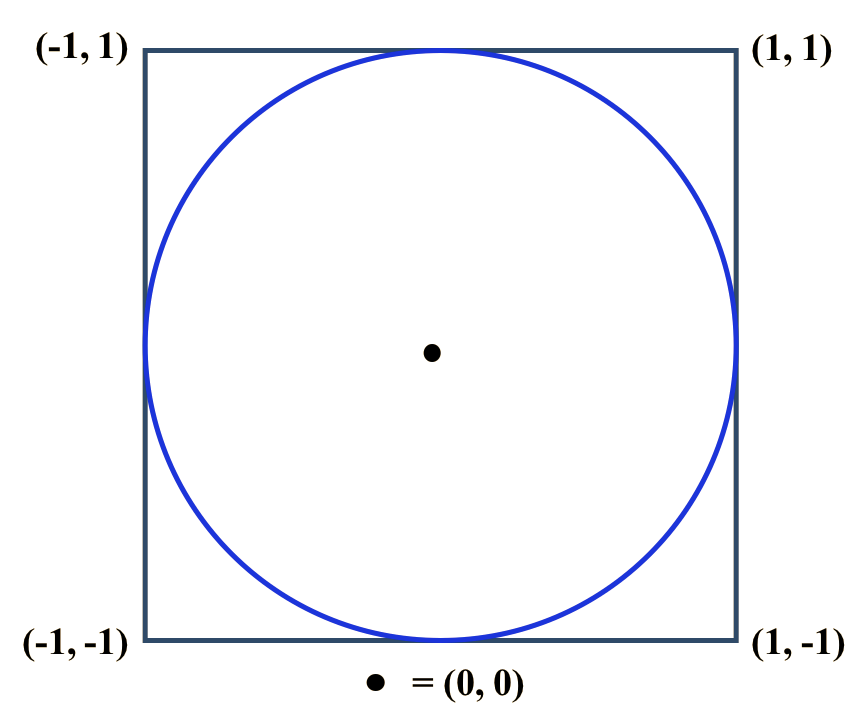

**Figura 1.** Círculo (<span style="color:blue">azul</span>) dentro de un cuadrado (negro).

Por lo tanto, si se genera una gran cantidad de puntos aleatorios $(x,y)$ en el cuadrado, la proporción de puntos que caen en el circulo será aproximadamente $\frac{\pi}{4}$. Ahora, si $X$ y $Y$ son variables aleatorias independientes y  uniformemente distribuidas en el intervalo $(-1,1)$, su densidad conjunta sería:

$$
\begin{align*}
f(x,y) &= f(x)f(y)\\
 &= \frac{1}{2} \cdot \frac{1}{2}\\
 &= \frac{1}{4},\;  -1\leqslant x\leqslant 1,\;  -1\leqslant y\leqslant 1
\end{align*}
$$

Dado que la función de densidad de $(X,Y)$ es constante en el cuadrado, se sigue (por definición) que $(X,Y)$ estan uniformemente distribuidos en el cuadrado. Ahora, si $U$ es uniforme en $(0,1)$, entonces $2U$ es uniforme en $(0,2)$, por lo que $2U-1$ es uniforme en $(-1,1)$. Por lo tanto, si se genera números aleatorios $U_1$ y $U_2$, se establece $X = 2U_1-1$ y $Y = 2U_2-1$, y se define la función $I$:


$$
I=\left\{\begin{matrix}
1 & si\: \: X^2 + Y^2 \leqslant 1 \\
0 & de\: \: lo\: \: contrario
\end{matrix}\right.
$$

entonces el valor esperado $E[I]$ seria:

$$E[I]=P\left \{ X^2 + Y^2 \leqslant 1 \right \} = \frac{\pi}{4}$$

Por tanto, se puede estimar $\frac{\pi}{4}$ generando un gran número de puntos $(x,y)$ a partir de los números aleatorios $u_1,u_2$ y calculando $\frac{\pi}{4}$ por la fracción de puntos del total que caen en el circulo, esto es para aquellos que se cuemple que $(2u_1-1)^2 + (2u_2-1)^2 \leqslant 1$.

## 4.1.
Implemente un método que permita estimar el valor de $\frac{\pi}{4}$ por medio de la generación de parejas de valores aleatorios $u_1,u_2$ donde para cada valor $u_1$ y $u_2$ se obtenga de una secuencia aleatoria de diferente correspondiente a un buen generador congruencial mixto distinto.


In [67]:
import random

# Generador congruencial mixto 1 modificado
def generador_congruencial_modificado_1(N):
    seed = 123456789
    multiplier = 1664525
    increment = 1013904223
    modulus = 2**32
    generated_numbers = []

    for _ in range(N):
        seed = (multiplier * seed + increment) % modulus
        generated_numbers.append(seed / modulus)

    return generated_numbers

# Generador congruencial mixto 2 modificado
def generador_congruencial_modificado_2(N):
    seed = 987654321
    multiplier = 6364136223846793005
    increment = 1
    modulus = 2**64
    generated_numbers = []

    for _ in range(N):
        seed = (multiplier * seed + increment) % modulus
        generated_numbers.append(seed / modulus)

    return generated_numbers

def estimar_pi_cuatro(N, sequence):
    points_inside_circle = 0

    for i in range(N):
        u1 = sequence[i]
        u2 = sequence[i + 1] if i + 1 < N else sequence[0]

        x = 2 * u1 - 1
        y = 2 * u2 - 1

        if x**2 + y**2 <= 1:
            points_inside_circle += 1

    pi_estimate_fourth = (points_inside_circle / N)
    return pi_estimate_fourth

# Número de puntos aleatorios a generar
total_points = 1000000

# Estimar π/4 utilizando generador congruencial mixto 1 modificado
sequence_1_mod = generador_congruencial_modificado_1(total_points)
pi_estimate_fourth_1_mod = estimar_pi_cuatro(total_points, sequence_1_mod)
print("Estimación de π/4 con generador 1 modificado:", pi_estimate_fourth_1_mod)

# Estimar π/4 utilizando generador congruencial mixto 2 modificado
sequence_2_mod = generador_congruencial_modificado_2(total_points)
pi_estimate_fourth_2_mod = estimar_pi_cuatro(total_points, sequence_2_mod)
print("Estimación de π/4 con generador 2 modificado:", pi_estimate_fourth_2_mod)


Estimación de π/4 con generador 1 modificado: 0.785288
Estimación de π/4 con generador 2 modificado: 0.784773


## 4.2.
Estimar el valor de $\frac{\pi}{4}$ generando 100, 1.000, 10.000, 100.000 y 1.000.000 de puntos usando las mismas semillas para cada secuencia, y calcule la diferencia para cada uno.

In [69]:
import random
import math

# Generador congruencial mixto con semilla predeterminada
def generador_congruencial_modificado(N, seed):
    x_current = seed
    a = 1664525
    c = 1013904223
    m = 2**32
    generated_numbers = []

    for _ in range(N):
        x_current = (a * x_current + c) % m
        generated_numbers.append(x_current / m)

    return generated_numbers

def estimar_pi_cuatro_modificado(N, sequence):
    points_inside_circle = 0

    for i in range(0, N, 2):
        u1 = sequence[i]
        u2 = sequence[i + 1]

        x = 2 * u1 - 1
        y = 2 * u2 - 1

        if x**2 + y**2 <= 1:
            points_inside_circle += 1

    pi_estimate_fourth = (points_inside_circle / (N // 2))
    return pi_estimate_fourth

# Semilla predeterminada para los generadores congruenciales
seed_fixed = 987654321

# Cantidad de puntos aleatorios a generar para cada prueba
point_counts = [100, 1000, 10000, 100000, 1000000]

# Estimar π/4 para diferentes cantidades de puntos
for N in point_counts:
    generated_sequence = generador_congruencial_modificado(N * 2, seed_fixed)
    pi_estimate_fourth_modified = estimar_pi_cuatro_modificado(N * 2, generated_sequence)
    difference = abs(pi_estimate_fourth_modified - (3.14159265358979323846 / 4))
    print(f"Cantidad de puntos: {N}, Estimación π/4: {pi_estimate_fourth_modified}, Diferencia: {difference}")


Cantidad de puntos: 100, Estimación π/4: 0.78, Diferencia: 0.005398163397448252
Cantidad de puntos: 1000, Estimación π/4: 0.785, Diferencia: 0.0003981633974482479
Cantidad de puntos: 10000, Estimación π/4: 0.7932, Diferencia: 0.007801836602551737
Cantidad de puntos: 100000, Estimación π/4: 0.78688, Diferencia: 0.0014818366025517449
Cantidad de puntos: 1000000, Estimación π/4: 0.785603, Diferencia: 0.00020483660255177227
